In [176]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [177]:
df = pd.read_excel(r"Past_Data.xlsx")
df

,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
555135,300659,656,2,2015-03-31,464,1,1,0,1,5595
555136,1708,349,2,2015-03-31,912,1,1,0,1,8975
555137,269948,94,2,2015-03-31,728,1,1,0,1,10610
555138,330569,270,2,2015-03-31,1344,1,1,0,1,12282


In [178]:
df.isna().sum().sum()

0

In [179]:
df.duplicated().sum()

0

In [180]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [181]:
df.dtypes

index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object

In [182]:
df.nunique()
# there are 570554 entries of store's data

index                  555140
store_id                 1115
day_of_week                 7
date                      820
nb_customers_on_day      3819
open                        2
promotion                   2
state_holiday               4
school_holiday              2
sales                   19654
dtype: int64

In [183]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[0 1]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
['a' 0 'b' 'c']

Unique values for school_holiday:
[1 0]



In [184]:
coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df['state_holiday'] = df['state_holiday'].map(coverage_mapping)
df['state_holiday'].unique()

array([1, 0], dtype=int64)

In [185]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter

In [186]:
df_closedays = df[df['open'] == 0]
df_closedays

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
0,511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
1,150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
2,633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
3,106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
4,278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553713,122036,1039,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1
553714,570327,109,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1
553715,103697,1038,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1
553716,628480,831,7,2015-03-29,0,0,0,0,0,0,29,3,2015,1


In [187]:
df_opendays = df[df['open'] == 1]
df_opendays

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
199,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1
223,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1
305,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1
312,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1
421,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555135,300659,656,2,2015-03-31,464,1,1,0,1,5595,31,3,2015,1
555136,1708,349,2,2015-03-31,912,1,1,0,1,8975,31,3,2015,1
555137,269948,94,2,2015-03-31,728,1,1,0,1,10610,31,3,2015,1
555138,330569,270,2,2015-03-31,1344,1,1,0,1,12282,31,3,2015,1


## Exploratory Data Analysis

#### Target variable = Sales

In [15]:
df['sales'].describe()

count    555140.000000
mean       5750.773942
std        3830.939859
min           0.000000
25%        3712.000000
50%        5710.000000
75%        7813.000000
max       38037.000000
Name: sales, dtype: float64

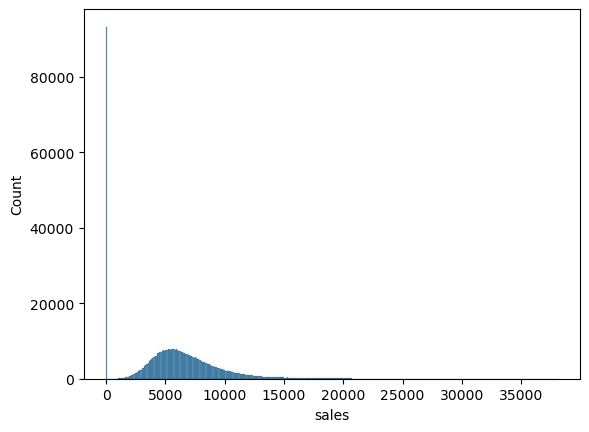

In [16]:
sns.histplot(df['sales'])
plt.show()
# when are sales = 0?

In [17]:
df_close = df[df['open'] == 0]
df_close['sales'].describe()
# when store is closed, sales = 0

count    93328.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: sales, dtype: float64

In [18]:
count_zero_sales = len(df_close)
count_zero_sales
# in 96.747 rows, around 17% of the dataset, stores are closed therefore sales are 0

93328

In [19]:
df_open = df[df['open'] == 1]
df_open['sales'].describe()

# there are 473807 entries of sales for when stores are open
# when stores are open some sales are still 0

count    461812.000000
mean       6912.952990
std        3099.662291
min           0.000000
25%        4819.000000
50%        6325.000000
75%        8311.000000
max       38037.000000
Name: sales, dtype: float64

In [20]:
zero_sales_rows = df_open[df_open['sales'] == 0]
count_zero_sales = len(zero_sales_rows)
count_zero_sales
# only 28 cases of 0 sales on open days (around 0,005% of the whole dataset and 0,006% of open days)

28

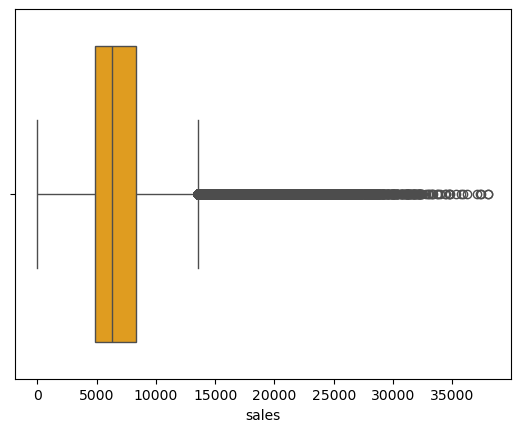

In [21]:
sns.boxplot(x= df_open[df_open['open'] == 1]['sales'], color = 'orange')
plt.show()

In [22]:
df_stores = df_open.groupby('store_id').agg({'sales': ['sum']})

for col in df_stores.columns:
    Q1 = df_stores[col].quantile(0.25)
    Q3 = df_stores[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {col}, Lower Bound: {lower_bound}, Q1: {Q1}, IQR: {IQR}, Q3: {Q3}, Upper Bound: {upper_bound}")

Column: ('sales', 'sum'), Lower Bound: 299238.0, Q1: 2131800.0, IQR: 1221708.0, Q3: 3353508.0, Upper Bound: 5186070.0


In [23]:
df_customers = df_open.groupby('store_id').agg({'nb_customers_on_day': ['max']})

for col in df_customers.columns:
    Q1 = df_customers[col].quantile(0.25)
    Q3 = df_customers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {col}, Lower Bound: {lower_bound}, Q1: {Q1}, IQR: {IQR}, Q3: {Q3}, Upper Bound: {upper_bound}")

Column: ('nb_customers_on_day', 'max'), Lower Bound: 143.75, Q1: 999.5, IQR: 570.5, Q3: 1570.0, Upper Bound: 2425.75


#### Number of customers on day

In [24]:
df['nb_customers_on_day'].describe()

count    555140.000000
mean        634.534616
std         464.169013
min           0.000000
25%         405.000000
50%         609.000000
75%         839.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

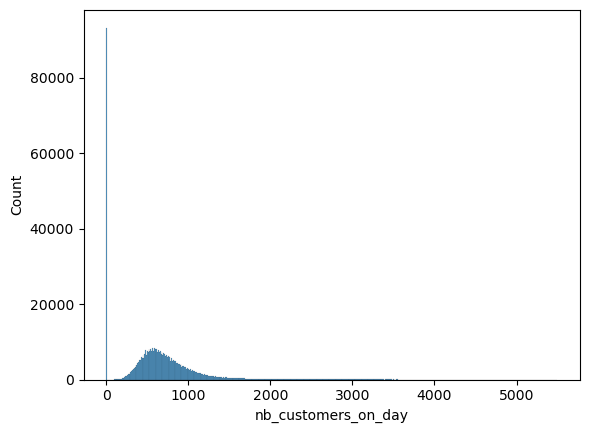

In [25]:
sns.histplot(df['nb_customers_on_day'])
plt.show()

In [26]:
df_open = df[df['open'] == 1]
df_open['nb_customers_on_day'].describe()
# some open days have nb_customers_on_day = 0

count    461812.000000
mean        762.768284
std         401.473840
min           0.000000
25%         517.000000
50%         676.000000
75%         894.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

In [27]:
zero_cust_rows = df_open[df_open['sales'] == 0]
count_zero_cust = len(zero_cust_rows)
count_zero_cust

# 28 days when stores where open but there were no customers and sales were 0

28

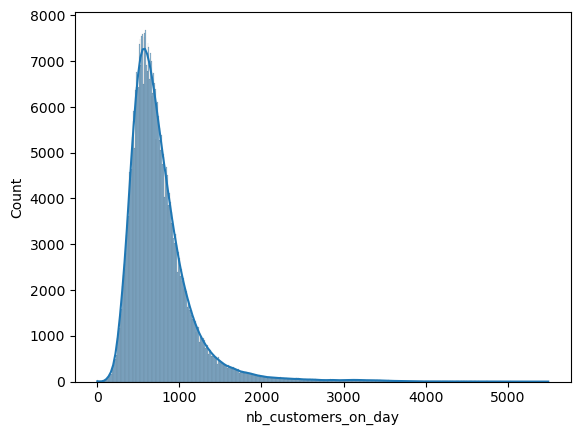

In [28]:
sns.histplot(df_open['nb_customers_on_day'], kde=True)
plt.show()

-48.5
1459.5


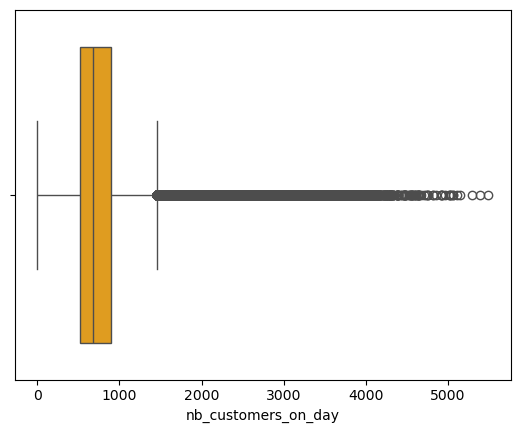

In [29]:
# To understand the outliers
Q1 = df_open['nb_customers_on_day'].quantile(0.25)
Q3 = df_open['nb_customers_on_day'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR 
print(lower_bound)
print (upper_bound)

sns.boxplot(x= df[df['open'] == 1]['nb_customers_on_day'], color = 'orange')
plt.show()

# days with a count of customers superior to 1458 can be considered outliers

In [30]:
df_close = df[df['open'] == 0]
df_close['nb_customers_on_day'].describe()
# when the store is close, there are no customers

count    93328.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: nb_customers_on_day, dtype: float64

#### Open

In [31]:
df.groupby('open').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']})
# when the store is closed, there are no sales

sales                                            
       min        mean    max          std         sum
open                                                  
0        0     0.00000      0     0.000000           0
1        0  6912.95299  38037  3099.662291  3192484646

In [32]:
df_opendays = df[df['open'] == 1]
df_opendays.nunique()

index                  461812
store_id                 1115
day_of_week                 7
date                      820
nb_customers_on_day      3819
open                        1
promotion                   2
state_holiday               2
school_holiday              2
sales                   19654
day                        31
month                      12
year                        3
quarter                     4
dtype: int64

In [33]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df_opendays[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[1]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
[1 0]

Unique values for school_holiday:
[1 0]



In [34]:
df_closedays = df[df['open'] == 0]
df_closedays.nunique()

index                  93328
store_id                1105
day_of_week                7
date                     565
nb_customers_on_day        1
open                       1
promotion                  2
state_holiday              2
school_holiday             2
sales                      1
day                       31
month                     12
year                       3
quarter                    4
dtype: int64

In [35]:
cat_vars = ['day_of_week','open', 'promotion', 'state_holiday', 'school_holiday']
for column in cat_vars:
    unique_values = df_closedays[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for open:
[0]

Unique values for promotion:
[0 1]

Unique values for state_holiday:
[1 0]

Unique values for school_holiday:
[1 0]



#### Store ID

In [36]:
# top 10 stores with higher average sales
df.groupby('store_id').agg({'sales': ['min', 'mean', 'max', 'std']}).sort_values(by=('sales', 'mean'), ascending=False).head (10)

sales                                  
            min          mean    max          std
store_id                                         
262       13210  20592.108365  37403  4605.054030
817           0  18202.981203  38025  9215.119602
562       11002  17973.963740  28680  2989.278719
1114          0  16677.947059  33188  8019.719785
251           0  15849.165049  35350  7892.263045
842           0  15066.248677  32228  7535.881591
733        6838  14966.541247  22137  1900.084845
513           0  14951.089866  29019  7661.088979
788           0  14768.678431  32170  7268.908739
383           0  14358.699203  28426  7148.360085

In [37]:
# top 10 stores with higher sum of sales
df.groupby('store_id').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).head (10)

,sales
,sum
store_id,
262,10831449
817,9683986
562,9418357
1114,8505753
251,8162320
513,7819420
788,7532026
733,7438371


In [38]:
# bottom 10 stores with lower average sales
df.groupby('store_id').agg({'sales': ['min', 'mean', 'max', 'std']}).sort_values(by=('sales', 'mean'), ascending=False).tail(10)

sales                                 
           min         mean    max          std
store_id                                       
656          0  2634.925620   6681  1374.154900
841          0  2569.274704   7020  1535.756836
794          0  2530.810247   5920  1255.100959
219          0  2526.940840   5801  1416.718022
972          0  2473.657640  10904  1908.294088
254          0  2470.138672   6114  1333.170229
198          0  2423.180422   8772  1866.274726
208          0  2407.694291   5864  1290.867208
543          0  2347.848606   7847  1541.027438
307          0  2223.391473   6951  1379.011374

In [39]:
# bottom 10 stores with lower sum of sales
df.groupby('store_id').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).tail(10)

,sales
,sum
store_id,
165,1271305
1065,1269839
254,1264711
198,1262477
32,1257544
186,1246564
1056,1230968
543,1178620


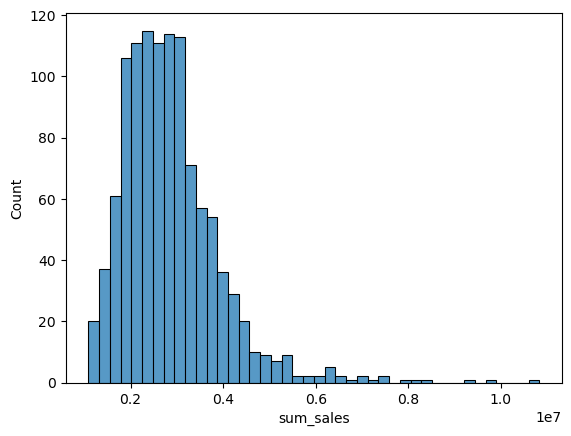

In [40]:
df_stores = df
df_stores['sum_sales'] = df_stores.groupby('store_id').agg({'sales': ['sum']})

sns.histplot(df_stores['sum_sales'])
plt.show()

# a few stores have very high sums of sales compared to the others

#### Day of week

               count         mean          std  min     25%     50%     75%  \
day_of_week                                                                   
1            78991.0  7849.631996  3967.572526  0.0  5251.0  7302.0  9971.0   
2            79778.0  6946.073918  3144.742082  0.0  4849.0  6409.0  8448.0   
3            79152.0  6453.086707  2941.143968  0.0  4640.0  6050.0  7828.0   
4            79276.0  6204.141796  3180.089078  0.0  4510.0  5974.5  7723.0   
5            79453.0  6774.943866  3040.685372  0.0  5007.0  6450.0  8214.0   
6            79401.0  5808.359769  2872.366827  0.0  3864.0  5366.0  7179.0   
7            79089.0   204.794940  1611.251271  0.0     0.0     0.0     0.0   

                 max  
day_of_week           
1            38037.0  
2            34692.0  
3            32149.0  
4            37403.0  
5            36227.0  
6            30940.0  
7            37376.0  


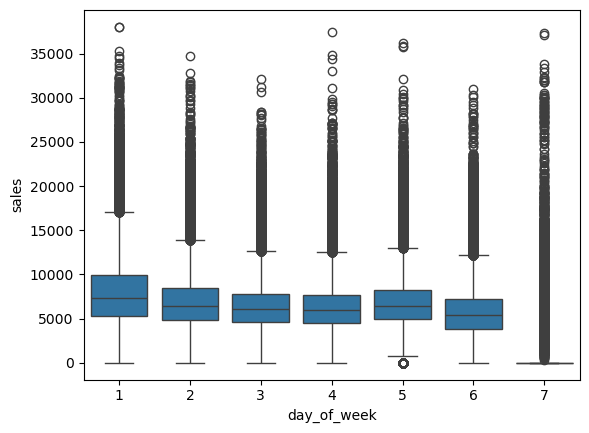

In [41]:
sns.boxplot(y='sales', x='day_of_week', data=df)
stats = df.groupby('day_of_week')['sales'].describe()

# Display the statistics
print(stats)
plt.show()

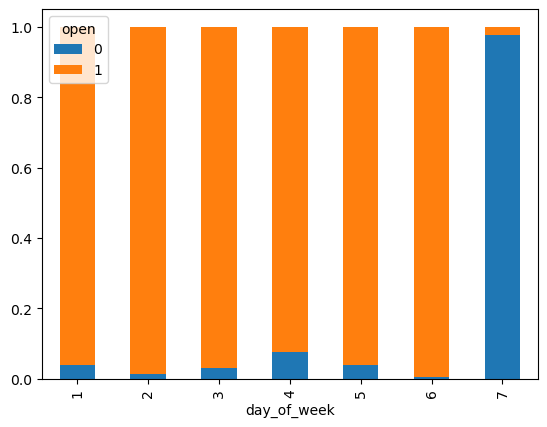

In [42]:
day_open = df.groupby('day_of_week')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# day 1 has the highest mean of sales, day 7 has the lowest since stores are usually close (that's why all sales look like outliers in the boxplot)

#### Dates

In [43]:
print (df['date'].min()) # first day in the df
print(df['date'].max()) #last day in the df

2013-01-01 00:00:00
2015-03-31 00:00:00


In [44]:
# top 10 dates with higher sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).head(10)

,sales
,sum
date,
2013-12-16,9713911
2013-12-23,9193454
2013-12-02,8265957
2014-06-30,8168953
2015-03-30,7992258
2013-12-17,7799832
2013-12-20,7714324
2013-12-18,7607398


In [45]:
# bottom 10 dates with lower sum of sales
df.groupby('date').agg({'sales': ['sum']}).sort_values(by=('sales', 'sum'), ascending=False).tail(10)

,sales
,sum
date,
2013-01-20,85952
2013-05-01,82175
2013-01-27,80235
2013-07-28,80075
2013-01-13,75825
2014-01-19,71332
2014-01-01,71014
2015-01-18,65174


In [46]:
#Split the dates
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,sum_sales
0,511306,52,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,NaN
1,150763,677,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,2047855.0
2,633749,348,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,2243835.0
3,106460,966,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,2952306.0
4,278363,750,2,2013-01-01,0,0,0,1,1,0,1,1,2013,1,4196775.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555135,300659,656,2,2015-03-31,464,1,1,0,1,5595,31,3,2015,1,NaN
555136,1708,349,2,2015-03-31,912,1,1,0,1,8975,31,3,2015,1,NaN
555137,269948,94,2,2015-03-31,728,1,1,0,1,10610,31,3,2015,1,NaN
555138,330569,270,2,2015-03-31,1344,1,1,0,1,12282,31,3,2015,1,NaN


In [47]:
df.groupby('day').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# last days of the month and the 1st are lower in sum of sales

sales                                            
      min         mean    max          std        sum
day                                                  
4       0  6831.684288  32252  3869.028697  125224773
2       0  6712.050170  31773  4237.405994  122682853
5       0  6685.044645  32228  3784.181025  122035490
18      0  6249.910813  35909  4034.312960  114154621
16      0  6224.636677  38037  4254.328109  113811257
30      0  7003.984791  31810  4395.640095  113744713
19      0  6121.242995  33357  3715.068276  112728811
17      0  6191.392299  34692  4018.936364  112559512
7       0  6152.588339  32263  3713.249845  111854056
3       0  6059.654838  35702  4373.637358  110655357
6       0  5999.745088  28800  3794.063783  109633342
28      0  5922.312917  27789  3681.575314  108295414
20      0  5756.524225  31157  3924.973118  105505576
23      0  5659.980495  35350  3768.853484  103305964
21      0  5589.556127  37122  3649.674318  102227392
12      0  5544.368877  30983  3234.122850  101650459
14      0  5549.691657  30112  3492.825939  101637053
27      0  5504.904387  32461  3417.280069  101389329
8       0  5487.179973  31263  3663.918468  100552573
10      0  5507.609307  28242  3333.823066  100243997
15      0  5477.912743  32221  4011.029341   99818526
11      0  5432.450542  32347  3049.018074   99185682
22      0  5343.502378  37376  3708.958142   97738002
13      0  5364.501735  30993  3314.427997   97413987
9       0  5121.805603  34692  3676.345186   93242471
24      0  5069.363169  33071  3128.161587   92769346
26      0  5077.657749  32169  3424.341492   92621555
25      0  4930.196711  31383  3320.197533   90227530
29      0  5400.722352  37403  4190.932526   87707731
1       0  4240.350980  34814  4594.705468   78094544
31      0  6462.233028  32368  4187.655676   69772730

<Axes: xlabel='day', ylabel='sales'>

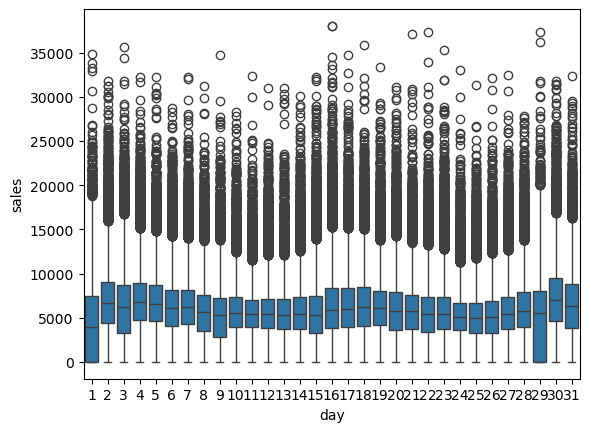

In [48]:
sns.boxplot(y='sales', x='day', data=df)

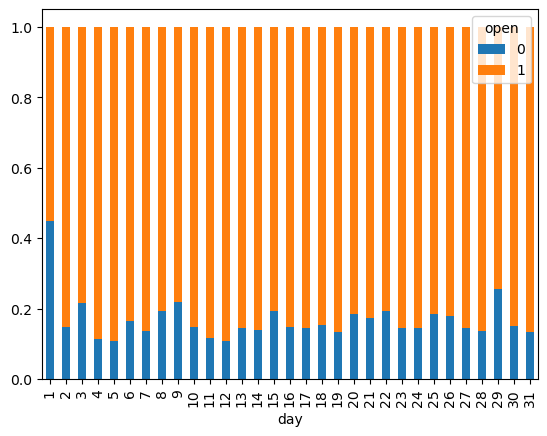

In [49]:
day_open = df.groupby('day')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# first day of the months is more often closed then sales are 0

In [50]:
df.groupby('month').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# first months of the year and December have higher sum of sales

sales                                            
        min         mean    max          std        sum
month                                                  
3         0  5784.065520  36227  3872.045809  378804235
1         0  5452.861614  32263  3568.053555  356638961
2         0  5645.027095  31649  3515.179706  332300165
12        0  6825.386305  38025  5049.164949  273206563
7         0  6035.865653  32221  3646.111907  241350124
5         0  5488.066315  37403  3936.864704  239334572
4         0  5651.294602  35909  3849.685899  238077739
6         0  5558.441905  38037  3856.874332  234699651
11        0  6007.007709  30940  3841.296806  232218904
8         0  5705.559173  32252  3550.383999  227651811
10        0  5528.251814  35702  3537.282333  221666313
9         0  5588.304119  32926  3532.130081  216535608

In [51]:
df.groupby('year').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# sum of sales is much lower in 2015 because we only have data until April

sales                                             
       min         mean    max          std         sum
year                                                   
2013     0  5662.198421  38025  3821.555043  1450728844
2014     0  5834.078328  38037  3884.152987  1375092262
2015     0  5799.160802  32228  3657.475406   366663540

In [52]:
df.groupby(['month', 'year']).agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# December, July and March are high selling months

sales                                            
             min         mean    max          std        sum
month year                                                  
12    2013     0  6672.653632  38025  5146.063077  145043472
7     2013     0  6045.933753  32221  3704.070024  131692529
3     2015     0  5937.037982  28339  3806.570308  130050817
12    2014     0  7006.893609  37122  4925.521577  128163091
3     2013     0  5832.365578  36227  4103.388130  127279714
1     2015     0  5750.919302  32228  3660.271280  124927220
8     2013     0  5739.905456  32252  3514.785735  124458370
11    2013     0  5886.828069  30940  3649.372294  123741126
5     2014     0  5623.764185  37403  3834.891757  123199802
4     2014     0  5812.123064  35909  4046.690665  123077518
3     2014     0  5581.661719  32368  3685.532947  121473704
6     2014     0  5692.985529  38037  4164.904238  120383872
10    2013     0  5422.042418  34369  3484.376065  118108350
1     2014     0  5408.165254  26911  3555.699487  118011574
5     2013     0  5351.092936  33357  4032.645035  116134770
4     2013     0  5488.746707  33326  3632.625261  115000221
6     2013     0  5423.464228  31810  3515.804980  114315779
1     2013     0  5201.288518  32263  3464.685776  113700167
9     2013     0  5342.883281  32926  3438.852006  112745523
2     2014     0  5726.405425  30507  3530.171343  112105839
      2015     0  5698.530690  29876  3475.351108  111685503
7     2014     0  6023.818666  29151  3575.591939  109657595
2     2013     0  5510.859472  31649  3535.877317  108508823
11    2014     0  6150.231205  30066  4053.639076  108477778
9     2014     0  5881.791057  29599  3618.850123  103790085
10    2014     0  5654.579174  35702  3595.209673  103557963
8     2014     0  5664.678103  30011  3591.964049  103193441

#### Promotion

In [53]:
df.groupby('promotion').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# promotion days have a higher sum of sales

sales                                             
            min         mean    max          std         sum
promotion                                                   
1             0  7971.371396  38037  3380.442095  1680596260
0             0  4391.054558  37403  3434.698593  1511888386

#### State Holiday

In [54]:
df.groupby('state_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)

sales                                             
                min         mean    max          std         sum
state_holiday                                                   
0                 0  5911.145646  38037  3755.098044  3188525162
1                 0   251.699447  37403  1811.814167     3959484

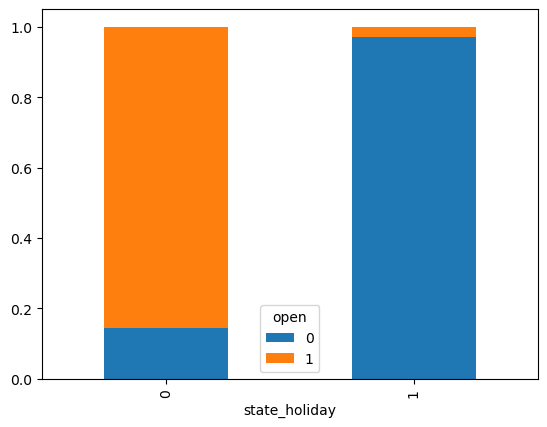

In [55]:
day_open = df.groupby('state_holiday')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()

# on state holidays stores are usually close so sales are mostly 0

#### School holiday

In [56]:
df.groupby('school_holiday').agg({'sales': ['min', 'mean', 'max', 'std', 'sum']}).sort_values(by=('sales', 'sum'), ascending=False)
# school holidays have higher sums of sales

sales                                             
                 min         mean    max          std         sum
school_holiday                                                   
0                  0  5606.474426  38037  3840.467617  2561643017
1                  0  6421.956481  35350  3713.345290   630841629

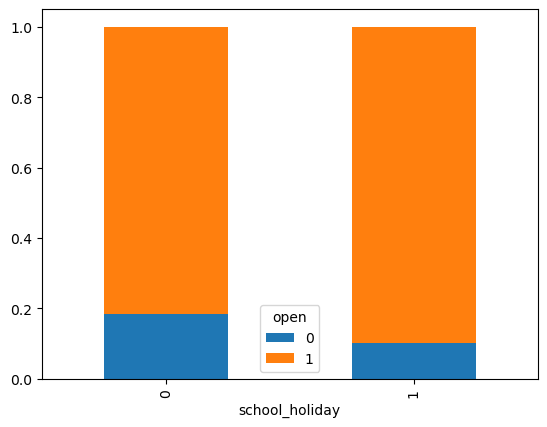

In [57]:
day_open = df.groupby('school_holiday')['open'].value_counts(normalize=True).unstack()
day_open.plot(kind='bar', stacked='True')
plt.show()
# stores are usually open on school holidays

### Correlations

In [58]:
df.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales', 'day',
       'month', 'year', 'quarter', 'sum_sales'],
      dtype='object')

In [59]:
df_metrics = df [['day_of_week', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'sales']]

correlations_matrix = df_metrics.corr()['sales']
print(correlations_matrix.sort_values(ascending=False))

sales                  1.000000
nb_customers_on_day    0.896600
open                   0.674831
promotion              0.453581
school_holiday         0.081236
month                  0.052610
year                   0.017961
day                   -0.015152
state_holiday         -0.245134
day_of_week           -0.463194
Name: sales, dtype: float64


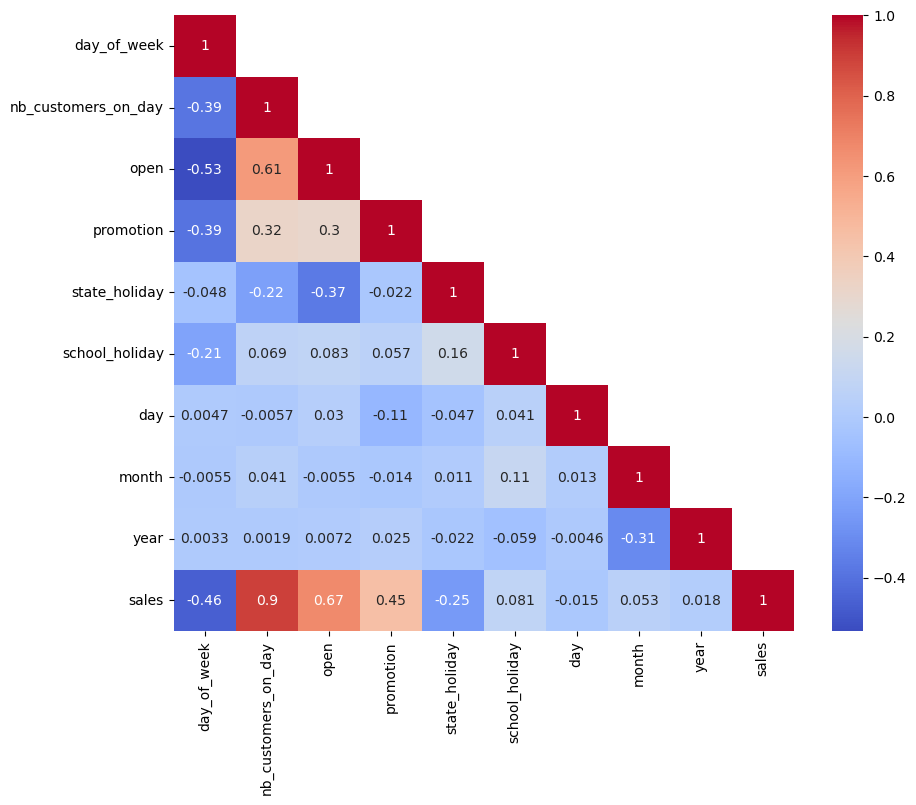

In [60]:
correlations_matrix = df_metrics.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

<Axes: xlabel='sales', ylabel='nb_customers_on_day'>

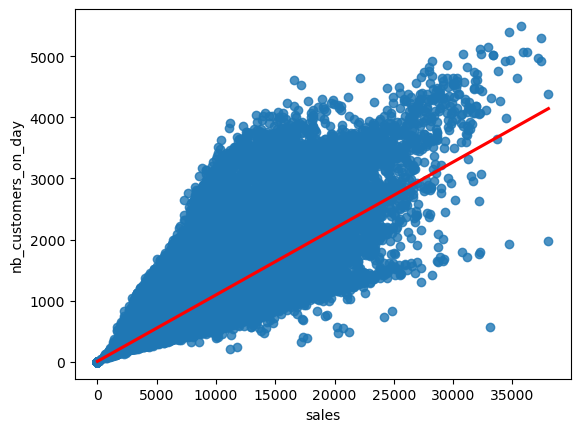

In [61]:
# most highly correlated variable

sns.regplot(x= 'sales', y= 'nb_customers_on_day', data=df_metrics, scatter=True, line_kws={"color": "red"})

## Prediction of Sales

In [188]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
from statsmodels.formula.api import ols

# X/y SPLIT
y = df_metrics['sales']
X = df_metrics.drop(['sales'], axis=1)
X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

# all P-values are below 0.05, so all of theses metrics are interesting for the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 3.653e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:01:01   Log-Likelihood:            -4.8311e+06
No. Observations:              555140   AIC:                         9.662e+06
Df Residuals:                  555130   BIC:                         9.662e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.403e+05   6138.146    -39.157      0.000   -2.52e+05   -2.28e+05
day_of_week           -74.8114      1.280    -58.441      0.000     -77.320     -72.302
nb_customers_on_day     6.0573      0.005   1113.376      0.000       6.047       6.068
open                 1467.3441      7.927    185.115      0.000    1451.808    1482.880
promotion            1267.5961      4.506    281.333      0.000    1258.765    1276.427
state_holiday        -711.7311     13.495    -52.741      0.000    -738.181    -685.281
school_holiday         40.0135      5.345      7.486      0.000      29.537      50.490
day                     0.3411      0.225      1.518      0.129      -0.099       0.781
month                  34.2887      0.583     58.792      0.000      33.146      35.432
year                  119.5138      3.048     39.214      0.000     113.540     125.487
==============================================================================
Omnibus:                    98426.101   Durbin-Watson:                   1.742
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1790255.444
Skew:                           0.323   Prob(JB):                         0.00
Kurtosis:                      11.774   Cond. No.                     6.65e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Chronological split

In time series data, using a random_state to split the data into training and test sets is generally not recommended. This is because time series data is inherently ordered, and random splits can disrupt the temporal sequence, which is crucial for maintaining the integrity of the data’s temporal dependencies.

In [189]:
# X/y SPLIT on OPEN DAYS
# Prepare features, target, and dates
y = df['sales']
X = df.drop(['sales','date','day','month','year'], axis=1)
dates = df[['date','day','month','year']]  # Keep 'date' aside for later use

In [190]:
# X_train, y_train: Features and target for training
# X_test, y_test: Features and target for testing
# dates_train: The corresponding 'date' values for X_train
# dates_test: The corresponding 'date' values for X_test

# Define the split point (training ends at June 2014, testing starts July 2014)
split_date = pd.Timestamp('2014-06-30')

# Create masks for splitting based on the chronological split date
train_mask = dates['date'] <= split_date  # Compare the 'date' column directly
test_mask = dates['date'] > split_date   # Compare the 'date' column directly

# Split the data chronologically using the masks
X_train = X[train_mask]
X_test = X[test_mask]

y_train = y[train_mask]
y_test = y[test_mask]

dates_train = dates[train_mask]
dates_test = dates[test_mask]

# Print the split sizes to verify
print(f"Training size: {len(X_train)}, Testing size: {len(X_test)}")

Training size: 383603, Testing size: 171537


### Build the ML model

#### Linear regression

In [191]:
lm = linear_model.LinearRegression()
lm = lm.fit(X_train,y_train)

lm.score(X_train,y_train)

pred = lm.predict(X_test)

print("R2 value is = ",round(r2_score(y_test, pred),2))
mse = mean_squared_error (y_test, pred)
mae = mean_absolute_error (y_test, pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  0.85
The mse of the model is =  2238394.6698257816
The root mse of the model is =  1496.1265554176164
The mean absolute error of the model is =  1004.6715603405485


#### Decision Tree

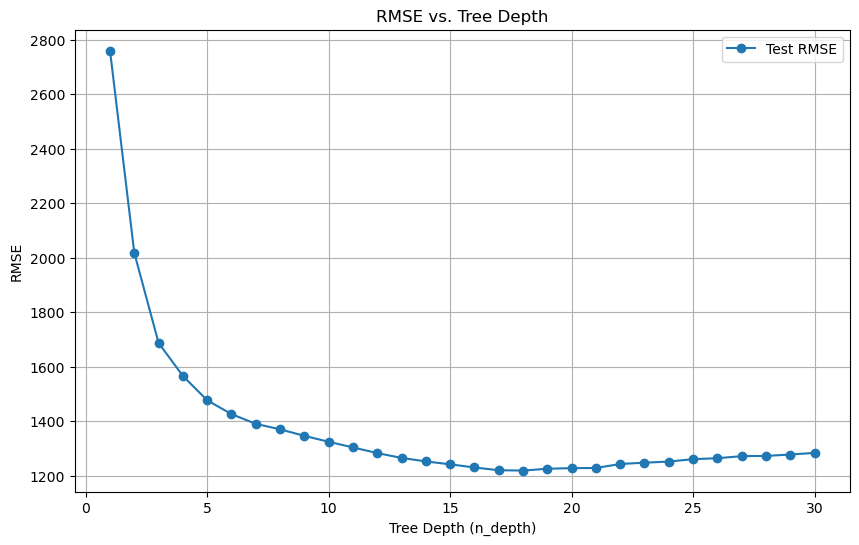

In [193]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1, 31)  # Depth values from 1 to 30
tree_test = []

# Loop over each depth value
for depth in max_depth:
    model_tree = DecisionTreeRegressor(max_depth=depth)
    model_tree.fit(X_train,y_train)
    
    # Calculate RMSE for test set
    pred_tree_test = model_tree.predict(X_test)
    mse_tree = mean_squared_error(y_test, pred_tree_test)
    tree_test.append(np.sqrt(mse_tree))

# Plot RMSE for train and test sets
plt.figure(figsize=(10, 6))
plt.plot(max_depth, tree_test, label="Test RMSE", marker='o')  # x-axis as n_depth
plt.ylabel("RMSE")
plt.xlabel("Tree Depth (n_depth)")
plt.title("RMSE vs. Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [194]:
tree_model = DecisionTreeRegressor(max_depth = 18)
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18)

In [195]:
tree_pred = tree_model.predict(X_test)

In [196]:
print("R2 value is = ",round(r2_score(y_test, tree_pred),2))
mse = mean_squared_error (y_test, tree_pred)
mae = mean_absolute_error (y_test, tree_pred)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

# a little better than the linear regresison

R2 value is =  0.9
The mse of the model is =  1491892.6972071973
The root mse of the model is =  1221.430594510878
The mean absolute error of the model is =  762.5716530894385


### Data cleaning an Filtering

#### Closed days

In [89]:
df_closedays = df[df['open'] == 0]
df_closedays = df_closedays[['day_of_week', 'nb_customers_on_day',
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'sales']]
df_closedays.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,day,month,year,sales
0,2,0,0,1,1,1,1,2013,0
1,2,0,0,1,1,1,1,2013,0
2,2,0,0,1,1,1,1,2013,0
3,2,0,0,1,1,1,1,2013,0
4,2,0,0,1,1,1,1,2013,0


In [90]:
correlations_close = df_closedays.corr()['sales']
print(correlations_close.sort_values(ascending=False))
# no correlations because there are no sales

day_of_week           NaN
nb_customers_on_day   NaN
promotion             NaN
state_holiday         NaN
school_holiday        NaN
day                   NaN
month                 NaN
year                  NaN
sales                 NaN
Name: sales, dtype: float64


In [91]:
# Linear Regression Model
y_closed = df_closedays['sales']
X_closed = df_closedays.drop(['sales'], axis=1)
model_closed = sm.OLS(y_closed,X_closed).fit()
model_closed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                     nan
Model:                            OLS   Adj. R-squared (uncentered):                nan
Method:                 Least Squares   F-statistic:                                nan
Date:                Wed, 20 Nov 2024   Prob (F-statistic):                         nan
Time:                        19:39:43   Log-Likelihood:                             inf
No. Observations:               93328   AIC:                                       -inf
Df Residuals:                   93321   BIC:                                       -inf
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
day_of_week                  0          0        nan        nan           0           0
nb_customers_on_day          0          0        nan        nan           0           0
promotion                    0          0        nan        nan           0           0
state_holiday                0          0        nan        nan           0           0
school_holiday               0          0        nan        nan           0           0
day                          0          0        nan        nan           0           0
month                        0          0        nan        nan           0           0
year                         0          0        nan        nan           0           0
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                     7.63e+18
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.49e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [92]:
lm_close = linear_model.LinearRegression()
lm_close = lm_close.fit(X_closed,y_closed)

lm_close.score(X_closed,y_closed)

pred_close = lm_close.predict(X_closed)

print("R2 value is = ",round(r2_score(y_closed, pred_close),2))
mse = mean_squared_error (y_closed, pred_close)
mae = mean_absolute_error (y_closed, pred_close)
print("The mse of the model is = ",mse)
print("The root mse of the model is = ",np.sqrt(mse))
print("The mean absolute error of the model is = ",mae)

R2 value is =  1.0
The mse of the model is =  0.0
The root mse of the model is =  0.0
The mean absolute error of the model is =  0.0


In [93]:
pred_close
# it only predicts zeros as it should

array([0., 0., 0., ..., 0., 0., 0.])

#### Open days

In [198]:
# Pre-select features
df_opendays = df[df['open'] == 1]
df_opendays = df_opendays[['day_of_week', 'nb_customers_on_day', 
       'promotion', 'state_holiday', 'school_holiday','date','day',
       'month', 'year', 'sales']]
df_opendays.head()

,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,date,day,month,year,sales
199,2,777,0,1,1,2013-01-01,1,1,2013,3821
223,2,729,0,1,1,2013-01-01,1,1,2013,3102
305,2,1751,0,1,1,2013-01-01,1,1,2013,9643
312,2,1444,0,1,1,2013-01-01,1,1,2013,6851
421,2,1248,0,1,1,2013-01-01,1,1,2013,5035


In [199]:
correlations_open = df_opendays.corr()['sales']
print(correlations_open.sort_values(ascending=False))
# correlations changed

sales                  1.000000
nb_customers_on_day    0.827737
promotion              0.364889
month                  0.083866
school_holiday         0.036849
year                   0.019431
state_holiday          0.019002
day                   -0.053220
day_of_week           -0.176930
Name: sales, dtype: float64


## Predictions of Sales on Open Days

In [200]:
y_open = df_opendays['sales']
X_open = df_opendays.drop(['sales','date','day','month','year'], axis=1)
dates_open = df_opendays[['date','day','month','year']]  # Keep 'date' aside for later use

X_open = sm.add_constant(X_open)
model_open = sm.OLS(y_open,X_open).fit()

model_open.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                 2.554e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:09:09   Log-Likelihood:            -4.0617e+06
No. Observations:              461812   AIC:                         8.123e+06
Df Residuals:                  461806   BIC:                         8.123e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1942.2751      8.050    241.288      0.000    1926.498    1958.052
day_of_week           -71.4889      1.438    -49.716      0.000     -74.307     -68.671
nb_customers_on_day     6.0714      0.006   1017.012      0.000       6.060       6.083
promotion            1308.2081      5.006    261.352      0.000    1298.397    1318.019
state_holiday       -1942.9250     75.448    -25.752      0.000   -2090.800   -1795.050
school_holiday         56.7952      6.048      9.391      0.000      44.941      68.649
==============================================================================
Omnibus:                    70543.243   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           921133.351
Skew:                           0.305   Prob(JB):                         0.00
Kurtosis:                       9.892   Cond. No.                     2.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Decision Tree (Open Days)

In [201]:
# X_train_open, y_train_open: Features and target for training
# X_test_open, y_test_open: Features and target for testing
# dates_train: The corresponding 'date' values for X_train_open
# dates_test: The corresponding 'date' values for X_test_open

# Define the split point (training ends at June 2014, testing starts July 2014)
split_date_open = pd.Timestamp('2014-06-30')

# Create masks for splitting based on the chronological split date
train_mask_open = dates_open['date'] <= split_date_open  # Compare the 'date' column directly
test_mask_open = dates_open['date'] > split_date_open   # Compare the 'date' column directly

# Split the data chronologically using the masks
X_train_open = X_open[train_mask_open]
X_test_open = X_open[test_mask_open]

y_train_open = y_open[train_mask_open]
y_test_open = y_open[test_mask_open]

dates_open_train = dates_open[train_mask_open]
dates_open_test = dates_open[test_mask_open]

# Print the split sizes to verify
print(f"Training size: {len(X_train_open)}, Testing size: {len(X_test_open)}")

Training size: 317388, Testing size: 144424


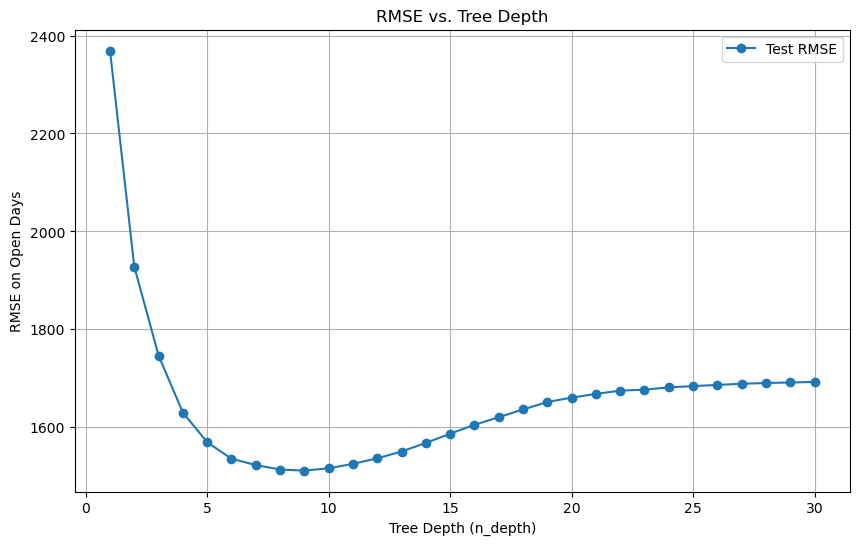

In [202]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1, 31)
test_open = []

# Loop over each depth value
for depth in max_depth:
    model_open = DecisionTreeRegressor(max_depth=depth)
    model_open.fit(X_train_open, y_train_open)
    
    # Calculate RMSE for test set
    pred_open_test = model_open.predict(X_test_open)
    mse_open_test = mean_squared_error(y_test_open, pred_open_test)
    test_open.append(np.sqrt(mse_open_test))

# Plot RMSE for train and test sets
plt.figure(figsize=(10, 6))
plt.plot(max_depth, test_open, label="Test RMSE", marker='o') 
plt.ylabel("RMSE on Open Days")
plt.xlabel("Tree Depth (n_depth)")
plt.title("RMSE vs. Tree Depth")
plt.legend()
plt.grid(True)
plt.show()

In [206]:
tree_model_open = DecisionTreeRegressor(max_depth = 9)
tree_model_open.fit(X_train_open, y_train_open)

DecisionTreeRegressor(max_depth=9)

In [207]:
tree_pred_open = tree_model_open.predict(X_test_open)

In [209]:
print("R2 value is = ",round(r2_score(y_test_open, tree_pred_open),2))
mse_open = mean_squared_error(y_test_open, tree_pred_open)
mae_open = mean_absolute_error(y_test_open, tree_pred_open)
print("The mse of the model is = ",mse_open)
print("The root mse of the model is = ",np.sqrt(mse_open))
print("The mean absolute error of the model is = ",mae_open)

# fitting is lower as expected because we removed all the 'right' predictions for 0 sales

R2 value is =  0.76
The mse of the model is =  2283785.1242690347
The root mse of the model is =  1511.219747180745
The mean absolute error of the model is =  1090.4203595589158


## Model including feature engineering

In [210]:
df_opendays = df[df['open'] == 1]
df_opendays.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter
199,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1
223,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1
305,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1
312,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1
421,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1


In [211]:
# Get mean of sales per store
store_sales = df_opendays.groupby('store_id')['sales'].mean().to_dict()
df_opendays['store_sales'] = df_opendays['store_id'].map(store_sales)

In [212]:
# Store ranking by sum of sales
store_sales_rank = df_opendays.groupby('store_id')['sales'].sum().rank(ascending=False).to_dict()
df_opendays['store_sales_rank'] = df_opendays['store_id'].map(store_sales_rank)

In [213]:
# Customer count rank by store
store_customer_rank = df_opendays.groupby('store_id')['nb_customers_on_day'].mean().rank(ascending=False).to_dict()
df_opendays['store_customer_rank'] = df_opendays['store_id'].map(store_customer_rank)

In [214]:
# Average customers per day of the week for each store
day_of_week_avg_customers = df_opendays.groupby(['store_id', 'day_of_week'])['nb_customers_on_day'].mean().reset_index()
day_of_week_avg_customers.columns = ['store_id', 'day_of_week', 'avg_customers_per_day_of_week']

# Merge the day_of_week_avg_customers back to the historical dataframe
df_opendays = df_opendays.merge(day_of_week_avg_customers, on=['store_id', 'day_of_week'], how='left')
df_opendays.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,day,month,year,quarter,store_sales,store_sales_rank,store_customer_rank,avg_customers_per_day_of_week
0,580156,676,2,2013-01-01,777,1,0,1,1,3821,1,1,2013,1,7427.725338,153.0,27.0,1653.807692
1,277247,274,2,2013-01-01,729,1,0,1,1,3102,1,1,2013,1,3849.450505,939.0,205.0,855.246753
2,253110,423,2,2013-01-01,1751,1,0,1,1,9643,1,1,2013,1,10688.100196,28.0,18.0,1715.027778
3,239216,259,2,2013-01-01,1444,1,0,1,1,6851,1,1,2013,1,11446.090406,19.0,12.0,2353.309859
4,60765,769,2,2013-01-01,1248,1,0,1,1,5035,1,1,2013,1,10473.249505,33.0,6.0,2941.430380


In [215]:
df_opendays.columns

Index(['index', 'store_id', 'day_of_week', 'date', 'nb_customers_on_day',
       'open', 'promotion', 'state_holiday', 'school_holiday', 'sales', 'day',
       'month', 'year', 'quarter', 'store_sales', 'store_sales_rank',
       'store_customer_rank', 'avg_customers_per_day_of_week'],
      dtype='object')

In [216]:
df_model = df_opendays[['day_of_week','date', 'nb_customers_on_day',
       'promotion', 'state_holiday', 'school_holiday', 'day',
       'month', 'year', 'quarter', 'store_sales','store_sales_rank', 'store_customer_rank','avg_customers_per_day_of_week','sales']]
correlations_open = df_model.corr()['sales']
print(correlations_open.sort_values(ascending=False))

sales                            1.000000
nb_customers_on_day              0.827737
store_sales                      0.774909
avg_customers_per_day_of_week    0.704476
promotion                        0.364889
month                            0.083866
quarter                          0.070848
school_holiday                   0.036849
year                             0.019431
state_holiday                    0.019002
day                             -0.053220
day_of_week                     -0.176930
store_customer_rank             -0.577046
store_sales_rank                -0.662917
Name: sales, dtype: float64


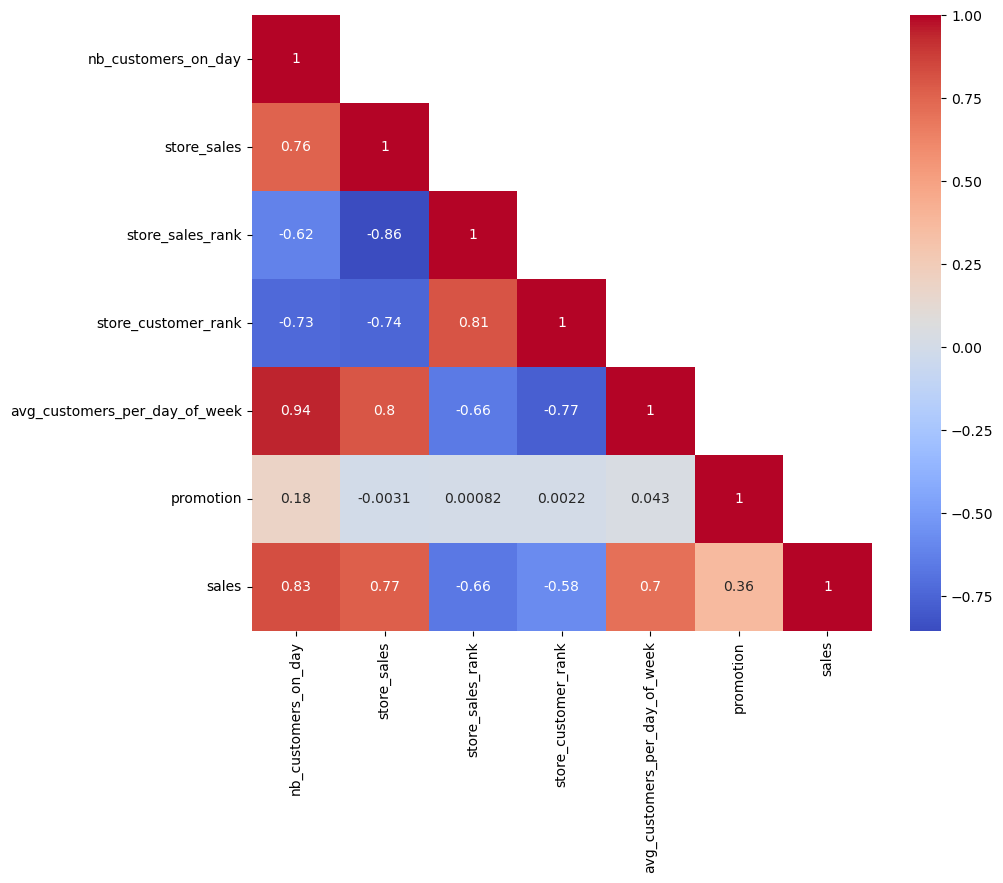

In [217]:
# check medium to high correlations
df_model_metrics = df_model[['nb_customers_on_day', 'store_sales','store_sales_rank', 'store_customer_rank','avg_customers_per_day_of_week', 'promotion', 'sales']]
correlations_matrix = df_model_metrics.corr()

mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask, k=1)] = True

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap="coolwarm")
plt.yticks(rotation=0)
plt.show()

In [218]:
# X/y SPLIT
# redefine df model including relevant features only
df_model = df_opendays[['date', 'nb_customers_on_day', 'store_sales',
                        'avg_customers_per_day_of_week', 'promotion',
                        'day_of_week', 'store_customer_rank', 'store_sales_rank', 'sales']]

y_open = df_model['sales']
X_open = df_model.drop(['sales', 'date'], axis=1)
dates_open = df_model['date']
X_open = sm.add_constant(X_open)

model_open = sm.OLS(y_open,X_open).fit()

model_open.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 6.411e+05
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:15:37   Log-Likelihood:            -3.8201e+06
No. Observations:              461812   AIC:                         7.640e+06
Df Residuals:                  461804   BIC:                         7.640e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           403.6027     12.866     31.370      0.000     378.386     428.819
nb_customers_on_day              10.1259      0.012    863.516      0.000      10.103      10.149
store_sales                       0.7346      0.001    494.544      0.000       0.732       0.738
avg_customers_per_day_of_week    -7.9748      0.014   -573.133      0.000      -8.002      -7.948
promotion                       850.4837      3.274    259.765      0.000     844.067     856.901
day_of_week                    -204.9893      0.868   -236.053      0.000    -206.691    -203.287
store_customer_rank               1.4448      0.009    158.127      0.000       1.427       1.463
store_sales_rank                 -1.2143      0.011   -113.916      0.000      -1.235      -1.193
==============================================================================
Omnibus:                    97366.822   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2478014.424
Skew:                           0.404   Prob(JB):                         0.00
Kurtosis:                      14.319   Cond. No.                     6.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [219]:
# Chronological split
# Define the split point (training ends at June 2014, testing starts July 2014)
split_date_open = pd.Timestamp('2014-06-30')

# Create masks for splitting based on the chronological split date
train_mask_open = dates_open <= split_date_open 
test_mask_open = dates_open > split_date_open  

# Split the data chronologically using the masks
X_train_open = X_open[train_mask_open]
X_test_open = X_open[test_mask_open]

y_train_open = y_open[train_mask_open]
y_test_open = y_open[test_mask_open]

dates_open_train = dates_open[train_mask_open]
dates_open_test = dates_open[test_mask_open]

# Print the split sizes to verify
print(f"Training size: {len(X_train_open)}, Testing size: {len(X_test_open)}")

Training size: 317388, Testing size: 144424


#### Decision Tree

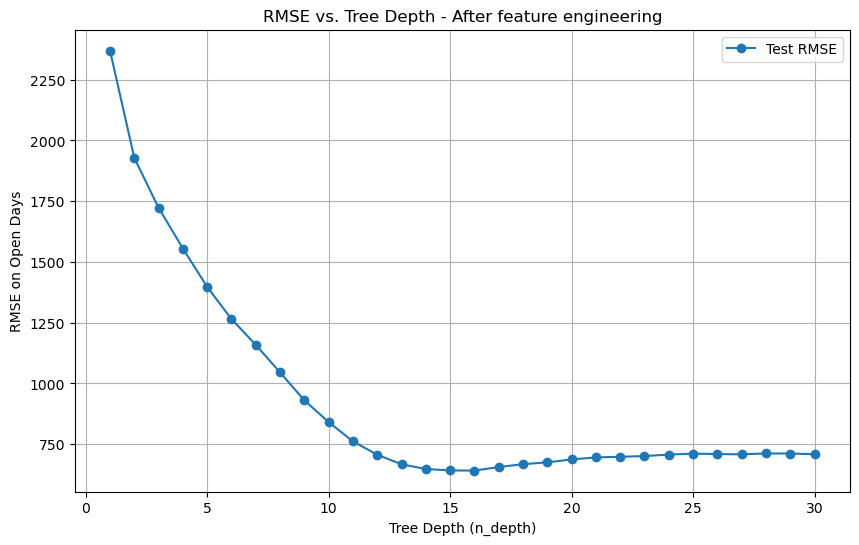

In [220]:
from sklearn.tree import DecisionTreeRegressor

max_depth = range(1, 31)
test_open = []

# Loop over each depth value
for depth in max_depth:
    model_open = DecisionTreeRegressor(max_depth=depth)
    model_open.fit(X_train_open, y_train_open)
    
    # Calculate RMSE for test set
    pred_open_test = model_open.predict(X_test_open)
    mse_open_test = mean_squared_error(y_test_open, pred_open_test)
    test_open.append(np.sqrt(mse_open_test))

# Plot RMSE for train and test sets
plt.figure(figsize=(10, 6))
plt.plot(max_depth, test_open, label="Test RMSE", marker='o')  # x-axis as n_depth
plt.ylabel("RMSE on Open Days")
plt.xlabel("Tree Depth (n_depth)")
plt.title("RMSE vs. Tree Depth - After feature engineering")
plt.legend()
plt.grid(True)
plt.show()

In [225]:
model_open = DecisionTreeRegressor(max_depth = 16)
model_open.fit(X_train_open, y_train_open)

DecisionTreeRegressor(max_depth=16)

In [226]:
tree_pred_open = model_open.predict(X_test_open)

print("R2 value is = ",round(r2_score(y_test_open, tree_pred_open),2))
mse_open = mean_squared_error (y_test_open, tree_pred_open)
mae_open = mean_absolute_error (y_test_open, tree_pred_open)
print("The mse of the model is = ",mse_open)
print("The root mse of the model is = ",np.sqrt(mse_open))
print("The mean absolute error of the model is = ",mae_open)

# this is really good

R2 value is =  0.96
The mse of the model is =  412340.1579486329
The root mse of the model is =  642.1371800080049
The mean absolute error of the model is =  428.9835791049731


### Random Forest

In [227]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold

model = RandomForestRegressor()

param_grid = {
    'n_estimators': [90,100,110],
    'max_depth': [15,16],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'bootstrap': [True, False]
    }

# Use KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_open, y_train_open)

# Best model
best_model = grid_search.best_estimator_

# Predict on test data
y_pred = best_model.predict(X_test_open)

# Evaluate the model
rmse_open = mean_squared_error(y_test_open, y_pred, squared=False)
print(f'RMSE: {rmse_open}')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
RMSE: 557.1889267712621


In [228]:
grid_search.best_params_ 

{'bootstrap': True,
 'max_depth': 16,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 90}

In [229]:
# Load the trained model
import joblib
joblib.dump(best_model, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [230]:
best_model.fit(X_train_open, y_train_open)

RandomForestRegressor(max_depth=16, min_samples_leaf=2, n_estimators=90)

In [231]:
best_pred = best_model.predict(X_test_open)

print("R2 value is = ",round(r2_score(y_test_open, best_pred),2))
mse_best_model = mean_squared_error (y_test_open, best_pred)
mae_best_model = mean_absolute_error (y_test_open, best_pred)
print("The mse of the model is = ",mse_best_model)
print("The root mse of the model is = ",np.sqrt(mse_best_model))
print("The mean absolute error of the model is = ",mae_best_model)

R2 value is =  0.97
The mse of the model is =  309754.95342331805
The root mse of the model is =  556.5563344561969
The mean absolute error of the model is =  377.9873494823394


### Import and preprocess the 'future data'

In [232]:
df_new = pd.read_excel(r"Future_data_without_label.xlsx")

df_new.columns = df_new.columns.str.lower().str.replace(' ', '_')

coverage_mapping = {'a': 1, 'b': 1, 'c': 1, 0: 0}
df_new['state_holiday'] = df_new['state_holiday'].map(coverage_mapping)

df_new.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,206630,125,3,2015-04-01,1906,1,1,0,1,NaN
1,60661,977,3,2015-04-01,485,1,1,0,1,NaN
2,373621,1019,3,2015-04-01,814,1,1,0,1,NaN
3,164705,309,3,2015-04-01,729,1,1,0,1,NaN
4,676424,1068,3,2015-04-01,444,1,1,0,1,NaN


In [233]:
df_new.nunique()

index                  85700
store_id                1115
day_of_week                7
date                     122
nb_customers_on_day     2698
open                       2
promotion                  2
state_holiday              2
school_holiday             2
sales                      0
dtype: int64

In [234]:
# Get open days to apply model
df_new_open = df_new[(df_new['open'] == 1) & (df_new['nb_customers_on_day'] > 0)]

In [235]:
# Apply trained ranks to new data
df_new_open['store_sales'] = df_new_open['store_id'].map(store_sales)

df_new_open['store_sales_rank'] = df_new_open['store_id'].map(store_sales_rank)

store_customer_rank = df_opendays.groupby('store_id')['nb_customers_on_day'].mean().rank(ascending=False).to_dict()
df_new_open['store_customer_rank'] = df_new_open['store_id'].map(store_customer_rank)

In [236]:
# Merge the average customers per day of the week to the new data

day_of_week_avg_customers = df_opendays.groupby(['store_id', 'day_of_week'])['nb_customers_on_day'].mean().reset_index()
day_of_week_avg_customers.columns = ['store_id', 'day_of_week', 'avg_customers_per_day_of_week']
df_new_open = df_new_open.merge(day_of_week_avg_customers, on=['store_id', 'day_of_week'], how='left')

In [237]:
df_new_open.head()

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,store_sales,store_sales_rank,store_customer_rank,avg_customers_per_day_of_week
0,206630,125,3,2015-04-01,1906,1,1,0,1,NaN,11663.105505,41.0,36.0,1522.507042
1,60661,977,3,2015-04-01,485,1,1,0,1,NaN,4910.423313,1048.0,875.0,521.087719
2,373621,1019,3,2015-04-01,814,1,1,0,1,NaN,9162.067524,482.0,399.0,715.423729
3,164705,309,3,2015-04-01,729,1,1,0,1,NaN,6961.559633,383.0,727.0,565.855072
4,676424,1068,3,2015-04-01,444,1,1,0,1,NaN,4377.986111,950.0,1111.0,290.987342


In [238]:
# Drop unnecessary columns
features_to_drop = ['sales', 'date']
df_new_open_features = df_new_open.drop(columns=features_to_drop, errors='ignore')

# Ensure all columns required for the model are present in the new data
missing_cols = set(X_open.columns) - set(df_new_open_features.columns)
for col in missing_cols:
    df_new_open_features[col] = 0

# Reorder columns to match the training set
df_new_open_features = df_new_open_features[X_open.columns]

# Predict sales using the best model
df_new_open['sales'] = best_model.predict(df_new_open_features)

In [239]:
# Merge final predictions back into df_new
df_new = df_new.drop(columns='sales')
df_new = df_new.merge(df_new_open[['index', 'sales']], on='index', how='left')
# Set sales to 0 for closed days or zero customers
df_new.loc[(df_new['open'] == 0) | (df_new['nb_customers_on_day'] == 0), 'sales'] = 0
df_new

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,206630,125,3,2015-04-01,1906,1,1,0,1,15402.530694
1,60661,977,3,2015-04-01,485,1,1,0,1,4708.151453
2,373621,1019,3,2015-04-01,814,1,1,0,1,10676.144689
3,164705,309,3,2015-04-01,729,1,1,0,1,9177.113512
4,676424,1068,3,2015-04-01,444,1,1,0,1,6979.820796
...,...,...,...,...,...,...,...,...,...,...
85695,369531,58,5,2015-07-31,603,1,1,0,0,7650.065445
85696,161452,241,5,2015-07-31,763,1,1,0,1,7112.800668
85697,242869,293,5,2015-07-31,878,1,1,0,1,6688.575226
85698,480480,14,5,2015-07-31,710,1,1,0,1,6273.156054


In [240]:
# Save the results with all columns
df_new.to_excel('Future_data_with_final_predictions.xlsx', index=False)

In [241]:
df_new_close = df_new[df_new['open'] == 0]
df_new_close                

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
1406,402135,683,5,2015-04-03,0,0,1,1,1,0.0
1407,94262,656,5,2015-04-03,0,0,1,1,1,0.0
1408,34747,549,5,2015-04-03,0,0,1,1,0,0.0
1409,681070,48,5,2015-04-03,0,0,1,1,0,0.0
1410,561096,361,5,2015-04-03,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
66754,652203,970,7,2015-07-26,0,0,0,0,0,0.0
66755,276729,760,7,2015-07-26,0,0,0,0,0,0.0
68837,530643,876,3,2015-07-29,0,0,1,0,1,0.0
69474,167551,292,4,2015-07-30,0,0,1,0,1,0.0
